<a href="https://colab.research.google.com/github/susansunshin/Project-2/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 2 Part 3

Susan Shin

##Load

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report)
from sklearn import set_config
set_config(display='diagram')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

filename = "/content/sample_data/wines_SPA 3.csv"
df = pd.read_csv(filename)
df.head()

Mounted at /content/drive


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


##Explore Data

In [ ]:
#Make Copy
df_ml = df

In [ ]:
#Remove num_reviews
df_ml = df_ml.drop(columns=["num_reviews"])
df_ml.head()

,winery,wine,year,rating,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
#Check for Dupes
df_ml.duplicated().sum()

5452

In [ ]:
#Drop Dupes
df_ml = df_ml.drop_duplicates()
df_ml.duplicated().sum()

0

In [ ]:
#Check for NAs
df_ml.isna().sum()

winery       0
wine         0
year         2
rating       0
country      0
region       0
price        0
type       106
body       271
acidity    271
dtype: int64

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   winery   2048 non-null   object 
 1   wine     2048 non-null   object 
 2   year     2046 non-null   object 
 3   rating   2048 non-null   float64
 4   country  2048 non-null   object 
 5   region   2048 non-null   object 
 6   price    2048 non-null   float64
 7   type     1942 non-null   object 
 8   body     1777 non-null   float64
 9   acidity  1777 non-null   float64
dtypes: float64(4), object(6)
memory usage: 176.0+ KB


In [ ]:
#Check for consistencies for object values
pd.set_option('display.max_column', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', -1)
pd.set_option('display.max_rows', None)

dtypes = df_ml.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols
  
for col in str_cols:
  print(f"- Column= {col}")
  print(df[col].value_counts(dropna=False))
  print('\n\n')

- Column= winery
Contino                                             457
Artadi                                              261
La Rioja Alta                                       254
Sierra Cantabria                                    237
Matarromera                                         232
Vina Pedrosa                                        230
Imperial                                            228
Losada                                              227
Portal del Priorat                                  225
Ramon Bilbao                                        225
Sei Solo                                            225
Matsu                                               224
Bodegas La Horra                                    223
Campillo                                            223
Lustau                                              223
La Vicalanda                                        223
Conreria d'Scala Dei                                223
Mar de Frades                  

The object in year is N.V. - which means Non Vintage. So this is a valid value.

Country is all Spain, no need for this column, will delete.

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 6100
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   winery   2048 non-null   object 
 1   wine     2048 non-null   object 
 2   year     2046 non-null   object 
 3   rating   2048 non-null   float64
 4   country  2048 non-null   object 
 5   region   2048 non-null   object 
 6   price    2048 non-null   float64
 7   type     1942 non-null   object 
 8   body     1777 non-null   float64
 9   acidity  1777 non-null   float64
dtypes: float64(4), object(6)
memory usage: 176.0+ KB


In [ ]:
#Check Numerical values for outliers
df_ml["rating"].value_counts()

4.3    706
4.4    484
4.5    281
4.2    228
4.6    191
4.7    112
4.8     44
4.9      2
Name: rating, dtype: int64

In [ ]:
df_ml["body"].value_counts()

4.0    1003
5.0     634
3.0     106
2.0      34
Name: body, dtype: int64

In [ ]:
df_ml["acidity"].value_counts()

3.0    1672
2.0      70
1.0      35
Name: acidity, dtype: int64

Looking to see what metrics have high correlation.

##Correlation heat map

I'm going to create a heat map to see how correlated the numerical values are.

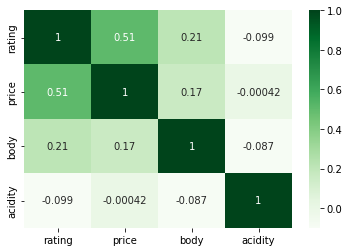

In [ ]:
corr = df_ml.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

I would like to explore price and rating -- mostly because I have heard that prices for wines are arbirtary and don't really have anything to do with the actual taste of the wine.

#Price and Rating

In [ ]:
df_ml = df_ml.sort_values("rating")

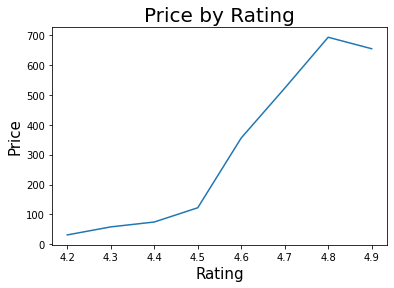

In [ ]:
sns.lineplot( data = df_ml, x= "rating", y = "price", ci = None)
plt.title("Price by Rating", size = 20)
plt.xlabel("Rating", size = 15)
plt.ylabel("Price", size = 15);

This graph, although simple, shows a very strong correlation of price vs. rating. 

In other words, the more expensive a bottle of wine is, the higher the rating.

This is definitely something to explore as we go through clustering as there could be imbalanced data sets that are affecting the correlation.

#Type/Price and Rating

Another attribute that I wanted to dig into was the type of wine, and what kind of correlation we can see when it comes to rating.

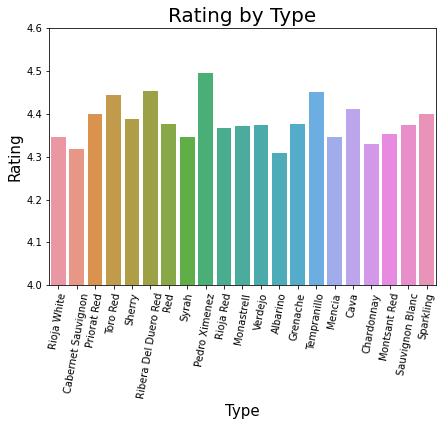

In [ ]:
sns.barplot( data = df_ml, x = "type", y = "rating", ci = None)
plt.tight_layout(pad=0)
plt.xticks(rotation = 80, size = 10)
plt.title("Rating by Type", size = 20)
plt.xlabel("Type", size = 15)
plt.ylabel("Rating", size = 15)
plt.ylim(4.0, 4.6);

Based on this bar plot, the type of wine that is highest rated is Pedro Ximenez followed by Ribera Del Duero and Toro red.

This will be a good base to understand the data before applying a model to the data.

#Assortment Deep Dive

Whenver looking at an assortment of product, it's always good to understand the assortment.

In otherwords, how many of each type, price, etc. were tasted. This can often have an effect on the rating, so it's always good to understand what the groupings there were.

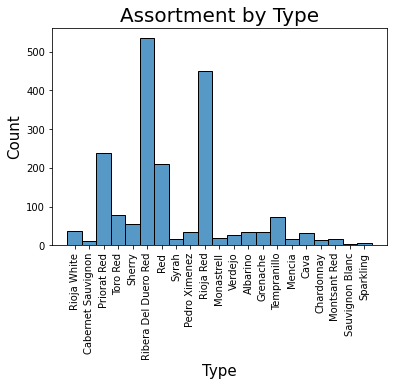

In [ ]:
sns.histplot( data = df_ml, x = "type")
plt.xticks(rotation = 90, size = 10)
plt.title("Assortment by Type", size = 20)
plt.xlabel("Type", size = 15)
plt.ylabel("Count", size = 15);

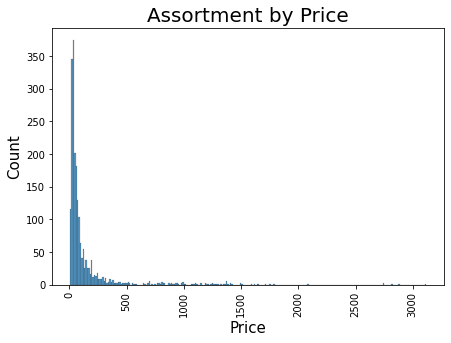

In [ ]:
sns.histplot( data = df_ml, x = "price")
plt.tight_layout(pad=0)
plt.xticks(rotation = 90, size = 10)
plt.title("Assortment by Price", size = 20)
plt.xlabel("Price", size = 15)
plt.ylabel("Count", size = 15);

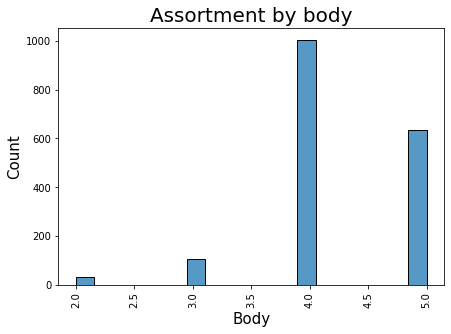

In [ ]:
sns.histplot( data = df_ml, x = "body")
plt.tight_layout(pad=0)
plt.xticks(rotation = 90, size = 10)
plt.title("Assortment by body", size = 20)
plt.xlabel("Body", size = 15)
plt.ylabel("Count", size = 15);